In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [ ]:
RN8_c10_bz = np.load('eval_curves/ResNet8_CIFAR10_EV_Bezier_1_2/curve.npz')
RN26_c10_bz = np.load('eval_curves/ResNet26_CIFAR10_EV_Bezier_1_2/curve.npz')
RN38_c10_bz = np.load('eval_curves/ResNet38_CIFAR10_EV_Bezier_1_2/curve.npz')
RN65_c10_bz = np.load('eval_curves/ResNet65_CIFAR10_EV_Bezier_1_2/curve.npz')
RN119_c10_bz = np.load('eval_curves/ResNet119_CIFAR10_EV_Bezier_1_2/curve.npz')

RN8_c10_pc = np.load('eval_curves/ResNet8_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN26_c10_pc = np.load('eval_curves/ResNet26_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN38_c10_pc = np.load('eval_curves/ResNet38_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN65_c10_pc = np.load('eval_curves/ResNet65_CIFAR10_EV_PolyChain_1_2/curve.npz')
RN119_c10_pc = np.load('eval_curves/ResNet119_CIFAR10_EV_PolyChain_1_2/curve.npz')

RN8_c100_bz = np.load('eval_curves/ResNet8_CIFAR100_EV_Bezier_1_2/curve.npz')
RN26_c100_bz = np.load('eval_curves/ResNet26_CIFAR100_EV_Bezier_1_2/curve.npz')
RN38_c100_bz = np.load('eval_curves/ResNet38_CIFAR100_EV_Bezier_1_2/curve.npz')
RN65_c100_bz = np.load('eval_curves/ResNet65_CIFAR100_EV_Bezier_1_2/curve.npz')
RN119_c100_bz = np.load('eval_curves/ResNet119_CIFAR100_EV_Bezier_1_2/curve.npz')

RN8_c100_pc = np.load('eval_curves/ResNet8_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN26_c100_pc = np.load('eval_curves/ResNet26_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN38_c100_pc = np.load('eval_curves/ResNet38_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN65_c100_pc = np.load('eval_curves/ResNet65_CIFAR100_EV_PolyChain_1_2/curve.npz')
RN119_c100_pc = np.load('eval_curves/ResNet119_CIFAR100_EV_PolyChain_1_2/curve.npz')

models_cifar10 = [
    ('RN8', RN8_c10_bz, RN8_c10_pc),
    ('RN26', RN26_c10_bz, RN26_c10_pc),
    ('RN38', RN38_c10_bz, RN38_c10_pc),
    ('RN65', RN65_c10_bz, RN65_c10_pc),
    ('RN119', RN119_c10_bz, RN119_c10_pc),
]

models_cifar100 = [
    ('RN8', RN8_c100_bz, RN8_c100_pc),
    ('RN26', RN26_c100_bz, RN26_c100_pc),
    ('RN38', RN38_c100_bz, RN38_c100_pc),
    ('RN65', RN65_c100_bz, RN65_c100_pc),
    ('RN119', RN119_c100_bz, RN119_c100_pc),
]


In [54]:
def summarize_models(models):
    
    # ---- Accuracy mean/min/max ----
    df_bez = pd.DataFrame({name: bz['te_acc'] for name, bz, _ in models}).T
    df_poly = pd.DataFrame({name: pc['te_acc'] for name, _, pc in models}).T
    
    df_bez = df_bez.agg(['mean','min','max'], axis=1).map(lambda x: f"{x:.2f}%")
    df_poly = df_poly.agg(['mean','min','max'], axis=1).map(lambda x: f"{x:.2f}%")
    
    
    # ---- AUC + Peak height ----
    def compute_metrics(df):
        ts = df['ts']
        te = df['te_acc']
        auc = np.max(te) - np.trapezoid(te, ts)
        peak = np.max(te) - np.min(te)
        norm_peak = peak / (np.mean(te))
        smoothness = np.sqrt(np.mean(((te[2:] - 2 * te[1:-1] + te[:-2]) / (ts[2:] - ts[:-2])**2)**2))
        return pd.Series({'auc': auc, 'peak_height': peak, 'norm_peak': norm_peak, 'smoothness': smoothness})

    df_bez_auc = pd.DataFrame({name: compute_metrics(bz) for name, bz, _ in models}).T
    df_poly_auc = pd.DataFrame({name: compute_metrics(pc) for name, _, pc in models}).T
    
    df_bez_auc['AUC'] = df_bez_auc['auc'].map(lambda x: f"{x:.4f}")
    df_bez_auc['PeakHeight'] = df_bez_auc['peak_height'].map(lambda x: f"{x:.2f}%")
    df_bez_auc['NormPeak'] = df_bez_auc['norm_peak'].map(lambda x: f"{x:.4f}")
    df_bez_auc['Smoothness'] = df_bez_auc['smoothness'].map(lambda x: f"{x:.4f}")

    df_poly_auc['AUC'] = df_poly_auc['auc'].map(lambda x: f"{x:.4f}")
    df_poly_auc['PeakHeight'] = df_poly_auc['peak_height'].map(lambda x: f"{x:.2f}%")
    df_poly_auc['NormPeak'] = df_poly_auc['norm_peak'].map(lambda x: f"{x:.4f}")
    df_poly_auc['Smoothness'] = df_poly_auc['smoothness'].map(lambda x: f"{x:.4f}")
    # ---- Return all four tables ----
    return df_bez, df_poly, df_bez_auc[['AUC','PeakHeight','NormPeak','Smoothness']], df_poly_auc[['AUC','PeakHeight','NormPeak','Smoothness']]

In [55]:

bez_c10_table, poly_c10_table, bez_c10_auc_table, poly_c10_auc_table = summarize_models(models_cifar10)
bez_c100_table, poly_c100_table, bez_c100_auc_table, poly_c100_auc_table = summarize_models(models_cifar100)

#########################
# CIFAR 10
print("-"*50)
print("CIFAR10")
print("-"*50,"\n")
print("Bezier accuracy:")
display(bez_c10_table)

print("PolyChain accuracy:")
display(poly_c10_table)

print("Bezier AUC + Peak Height:")
display(bez_c10_auc_table)

print("PolyChain AUC + Peak Height:")
display(poly_c10_auc_table)

#########################
# CIFAR 100
print("-"*50)
print("CIFAR100")
print("-"*50,"\n")
print("Bezier accuracy:")
display(bez_c100_table)

print("PolyChain accuracy:")
display(poly_c100_table)

print("Bezier AUC + Peak Height:")
display(bez_c100_auc_table)

print("PolyChain AUC + Peak Height:")
display(poly_c100_auc_table)


--------------------------------------------------
CIFAR10
-------------------------------------------------- 

Bezier accuracy:


,mean,min,max
RN8,85.55%,83.72%,87.71%
RN26,91.56%,90.57%,92.57%
RN38,92.20%,91.37%,93.18%
RN65,93.02%,92.37%,93.99%
RN119,93.74%,93.25%,94.35%


PolyChain accuracy:


,mean,min,max
RN8,85.27%,83.51%,87.62%
RN26,91.36%,89.93%,92.47%
RN38,92.15%,91.21%,93.11%
RN65,92.89%,92.20%,93.90%
RN119,93.49%,92.56%,94.19%


Bezier AUC + Peak Height:


,AUC,PeakHeight,NormPeak,Smoothness
RN8,2.1959,3.99%,0.0466,506.6923
RN26,1.0238,2.00%,0.0218,369.9605
RN38,0.9978,1.81%,0.0196,299.5637
RN65,0.9788,1.62%,0.0174,355.7128
RN119,0.6157,1.10%,0.0117,347.4679


PolyChain AUC + Peak Height:


,AUC,PeakHeight,NormPeak,Smoothness
RN8,2.3770,4.11%,0.0482,452.8466
RN26,1.1292,2.54%,0.0278,369.9438
RN38,0.9705,1.90%,0.0206,420.6306
RN65,1.0170,1.70%,0.0183,290.8697
RN119,0.7061,1.63%,0.0174,329.4666


--------------------------------------------------
CIFAR100
-------------------------------------------------- 

Bezier accuracy:


,mean,min,max
RN8,55.84%,52.90%,59.92%
RN26,67.02%,64.52%,69.71%
RN38,68.94%,66.96%,71.18%
RN65,72.30%,71.15%,73.44%


PolyChain accuracy:


,mean,min,max
RN8,55.58%,52.93%,59.55%
RN26,66.82%,64.35%,69.44%
RN38,68.90%,67.42%,70.78%
RN65,72.35%,71.18%,73.63%


Bezier AUC + Peak Height:


,AUC,PeakHeight,NormPeak,Smoothness
RN8,4.1395,7.02%,0.1257,477.5120
RN26,2.7302,5.19%,0.0774,573.3638
RN38,2.2612,4.22%,0.0612,566.2271
RN65,1.1581,2.29%,0.0317,445.1566


PolyChain AUC + Peak Height:


,AUC,PeakHeight,NormPeak,Smoothness
RN8,4.0326,6.62%,0.1191,638.8732
RN26,2.6526,5.09%,0.0762,558.7511
RN38,1.9018,3.36%,0.0488,550.5283
RN65,1.2898,2.45%,0.0339,403.7744


In [ ]:
def plot_model_curves(models, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-10"):
    fig, axs = plt.subplots(1, 2, figsize=(14,5), sharey=True)

    # ---- Left: Bezier curves ----
    for name, bz, _ in models:
        ts = bz['ts']
        acc = bz[f'{type}_acc']
        axs[0].plot(ts, acc, label=name)

    axs[0].set_xlabel('t (Path Parameter)')
    if type == "te":
        axs[0].set_ylabel('Test Accuracy (%)')
    elif type == "tr":
        axs[0].set_ylabel('Train Accuracy (%)')
    axs[0].set_title('Bezier')
    axs[0].legend()

    # ---- Right: PolyChain curves ----
    for name, _, pc in models:
        ts = pc['ts']
        acc = pc[f'{type}_acc']
        axs[1].plot(ts, acc, label=name)

    axs[1].set_xlabel('t (Path Parameter)')
    axs[1].set_title('PolyChain')
    axs[1].legend()

    # ---- Global title / layout ----
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

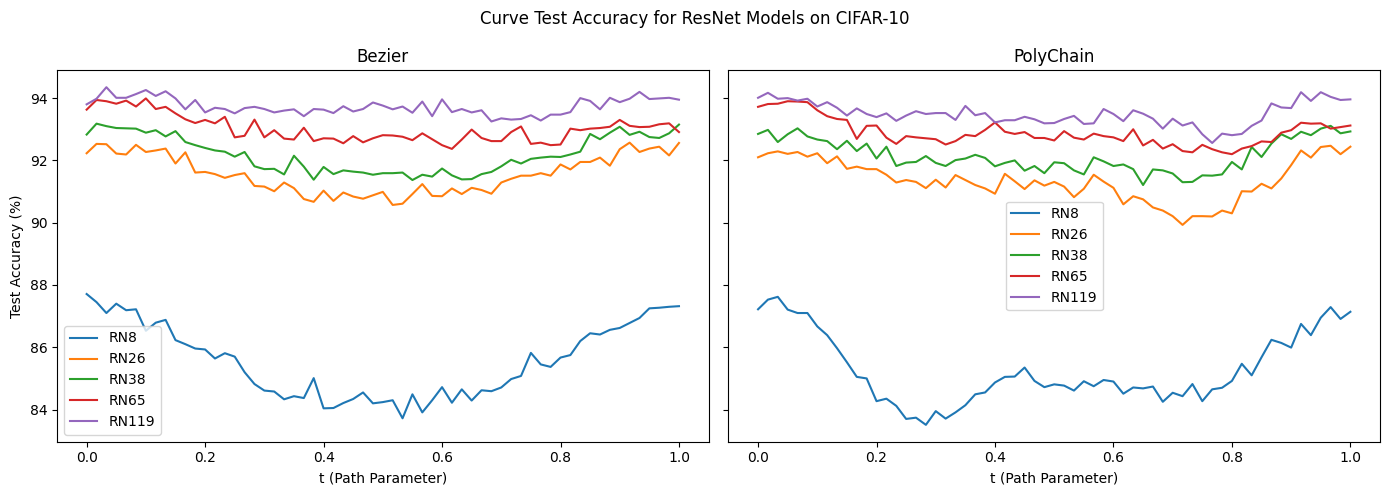

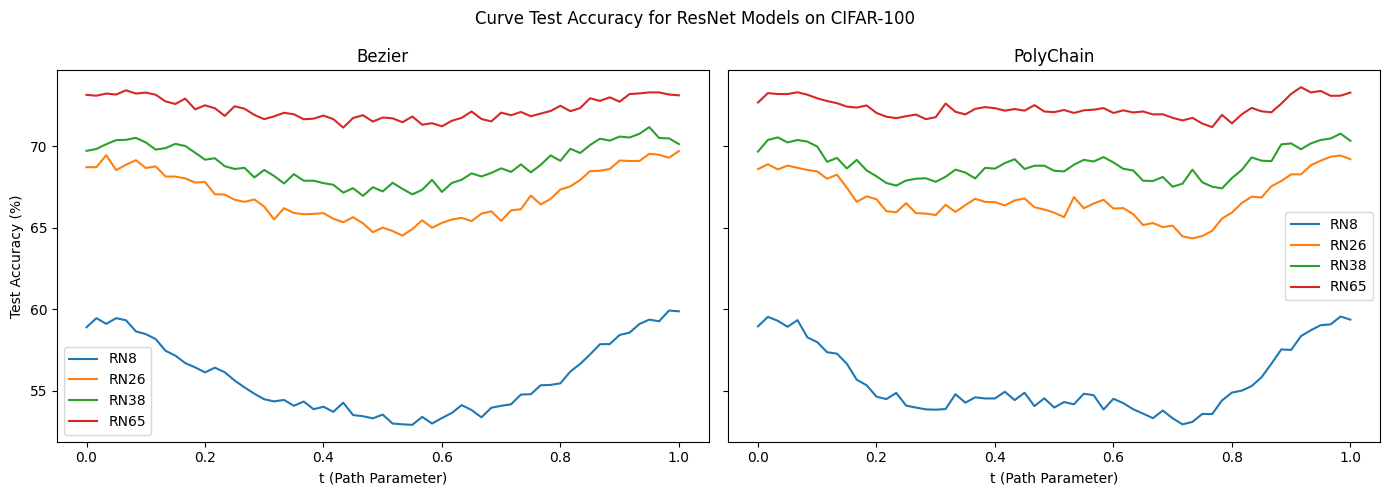

In [ ]:
plot_model_curves(models_cifar10, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-10")
plot_model_curves(models_cifar100, type="te", title="Curve Test Accuracy for ResNet Models on CIFAR-100")
plot_model_curves(models_cifar10, type="tr", title="Curve Train Accuracy for ResNet Models on CIFAR-10")
plot_model_curves(models_cifar100, type="tr", title="Curve Train Accuracy for ResNet Models on CIFAR-100")

In [58]:
# #Open angles/angle_data.csv as pandas dataframe
angle_df = pd.read_csv('results/angles/angle_data.csv', delimiter=';')
cifar10_df = angle_df[angle_df['dataset'] == 'CIFAR10']
cifar100_df = angle_df[angle_df['dataset'] == 'CIFAR100']

print("CIFAR10 Data:")
display(cifar10_df)

print("CIFAR100 Data:")
display(cifar100_df)


CIFAR10 Data:


,dataset,model,AC_norm,BC_norm,angle_rad,angle_deg
0,CIFAR10,ResNet8,38.75229,38.68528,1.211135,69.392947
1,CIFAR10,ResNet26,49.15702,48.49026,1.087526,62.310644
2,CIFAR10,ResNet38,49.77663,53.36667,1.095705,62.779255
3,CIFAR10,ResNet65,50.40259,49.95597,0.993303,56.912052
4,CIFAR10,ResNet119,51.88686,54.48196,0.962648,55.155670


CIFAR100 Data:


,dataset,model,AC_norm,BC_norm,angle_rad,angle_deg
5,CIFAR100,ResNet8,58.72358,59.81335,1.234761,70.746611
6,CIFAR100,ResNet26,76.24537,78.02316,1.200143,68.763103
7,CIFAR100,ResNet38,85.79421,84.68199,1.224831,70.177646
8,CIFAR100,ResNet65,70.44422,72.94723,1.150420,65.914206


In [9]:
rn18_cifar10_convex = np.loadtxt('results/convex_combo/ResNet8_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn26_cifar10_convex = np.loadtxt('results/convex_combo/ResNet26_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn38_cifar10_convex = np.loadtxt('results/convex_combo/ResNet38_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn65_cifar10_convex = np.loadtxt('results/convex_combo/ResNet65_CIFAR10_convex.csv', delimiter=',', skiprows=1)
rn119_cifar10_convex = np.loadtxt('results/convex_combo/ResNet119_CIFAR10_convex.csv', delimiter=',', skiprows=1)

rn18_cifar100_convex = np.loadtxt('results/convex_combo/ResNet8_CIFAR100_convex.csv', delimiter=',', skiprows=1)
rn26_cifar100_convex = np.loadtxt('results/convex_combo/ResNet26_CIFAR100_convex.csv', delimiter=',', skiprows=1)
rn38_cifar100_convex = np.loadtxt('results/convex_combo/ResNet38_CIFAR100_convex.csv', delimiter=',', skiprows=1)
rn65_cifar100_convex = np.loadtxt('results/convex_combo/ResNet65_CIFAR100_convex.csv', delimiter=',', skiprows=1)
rn119_cifar100_convex = np.loadtxt('results/convex_combo/ResNet119_CIFAR100_convex.csv', delimiter=',', skiprows=1)

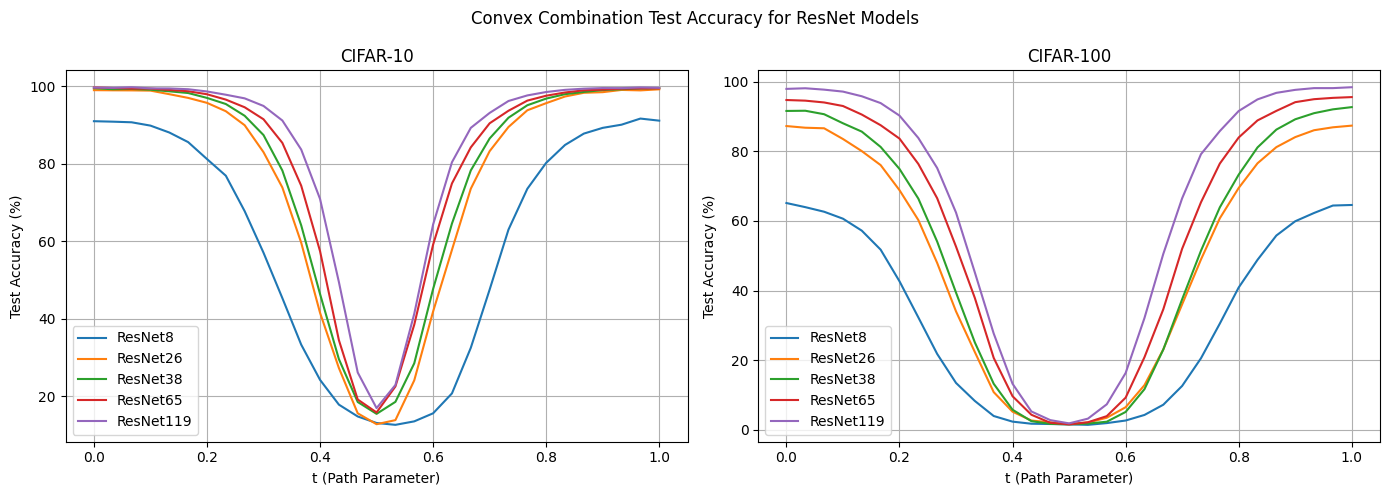

In [12]:

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# --- Left plot: CIFAR-10 ---
axs[0].plot(rn18_cifar10_convex[:,0], rn18_cifar10_convex[:,2], label='ResNet8')
axs[0].plot(rn26_cifar10_convex[:,0], rn26_cifar10_convex[:,2], label='ResNet26')
axs[0].plot(rn38_cifar10_convex[:,0], rn38_cifar10_convex[:,2], label='ResNet38')
axs[0].plot(rn65_cifar10_convex[:,0], rn65_cifar10_convex[:,2], label='ResNet65')
axs[0].plot(rn119_cifar10_convex[:,0], rn119_cifar10_convex[:,2], label='ResNet119')

axs[0].legend()
axs[0].set_xlabel('t (Path Parameter)')
axs[0].set_ylabel('Test Accuracy (%)')
axs[0].set_title('CIFAR-10')
axs[0].grid(True)

# --- Right plot: CIFAR-100 ---
axs[1].plot(rn18_cifar100_convex[:,0], rn18_cifar100_convex[:,2], label='ResNet8')
axs[1].plot(rn26_cifar100_convex[:,0], rn26_cifar100_convex[:,2], label='ResNet26')
axs[1].plot(rn38_cifar100_convex[:,0], rn38_cifar100_convex[:,2], label='ResNet38')
axs[1].plot(rn65_cifar100_convex[:,0], rn65_cifar100_convex[:,2], label='ResNet65')
axs[1].plot(rn119_cifar100_convex[:,0], rn119_cifar100_convex[:,2], label='ResNet119')

axs[1].legend()
axs[1].set_xlabel('t (Path Parameter)')
axs[1].set_ylabel('Test Accuracy (%)')
axs[1].set_title('CIFAR-100')
axs[1].grid(True)

fig.suptitle('Convex Combination Test Accuracy for ResNet Models')
plt.tight_layout()
plt.show()
